In [28]:
import networkx as nx
import osmnx as ox
import pandas as pd
import os

ox.__version__

'2.0.0'

In [64]:
# download/model a street network for some city then visualize it
capitals_comarca = [
    "Barcelona", "Girona", "Lleida", "Tarragona", "Mataró", "Sabadell", 
    "Terrassa", "Manresa", "Vic", "Igualada", "Vilafranca del Penedès", "Vilanova i la Geltrú", 
    "el Vendrell", "Reus", "Tortosa", "Amposta", "Gandesa", "Falset", "Montblanc", 
    "Valls", "Balaguer", "Cervera", "Solsona", "la Seu d'Urgell", "Sort", "Tremp", 
    "el Pont de Suert", "Mollerussa", "les Borges Blanques", "Tàrrega", 
    "Olot", "Ripoll", "Puigcerdà", "Banyoles", "la Bisbal d'Empordà", "Santa Coloma de Farners",
    "Figueres", "Vielha e Mijaran", "Berga", "Sant Feliu de Llobregat", "Granollers", "Móra d'Ebre",
    "Prats de Lluçanès", "Moià"
]


for capital in capitals_comarca:
#if capital is not saved, download it
    if not os.path.exists(f"Graphs/{capital}.graphml"):
        print(f"Creant graf de {capital}...")
        try:
            # Obtenir el graf de la ciutat
            G = ox.graph_from_place(capital + ", Catalunya, Spain", network_type='drive')
            
            # Guardar el graf en un fitxer
            ox.save_graphml(G, filepath=f"Graphs/{capital}.graphml")
            print(f"Graf de {capital} creat i guardat.")
        except Exception as e:
            print(f"No s'ha pogut crear el graf per a {capital}: {e}")

In [ ]:
# #Visualize the graphs
# for capital in capitals_comarca:
#     print(f"Visualitzant graf de {capital}...")
#     try:
#         # Carregar el graf des del fitxer
#         G = ox.load_graphml(filepath=f"Graphs/{capital}.graphml")
#         ox.plot_graph(G)
#     except Exception as e:
#         print(f"No s'ha pogut visualitzar el graf per a {capital}: {e}")

# Load "Vic" graph and visualize it
G = ox.load_graphml(filepath=f"Graphs/Vic.graphml")
ox.plot_graph(G)


In [36]:
# Convert the graph to node and edge GeoPandas GeoDataFrames
gdf_nodes, gdf_edges = ox.convert.graph_to_gdfs(G)

## Basic street network metrics calculation

In [ ]:
import math

data = []

H_max = math.log(36)  # ~3.584913
H_g   = 1.386  

for capital in capitals_comarca:
    try:
        # Obtenir el graf de la ciutat
        G = ox.graph_from_place(capital + ", Catalunya, Spain", network_type='drive')
        # Add edge bearings
        ox.bearing.add_edge_bearings(G)

        G_proj = ox.projection.project_graph(G)
        # Show some basic stats about the network
        basic_stats = ox.stats.basic_stats(G_proj)

        # Calcular les mètriques
        num_nodes = len(G.nodes)
        num_edges = len(G.edges)
        avg_node_degree = sum(dict(G.degree()).values()) / num_nodes
        total_length = basic_stats["street_length_total"]
        avg_street_length = basic_stats["street_length_avg"]
        avg_betweenness_centrality_nodes = nx.betweenness_centrality(G)
        avg_betweenness_centrality_nodes = sum(avg_betweenness_centrality_nodes.values()) / num_nodes
        avg_betweenness_centrality_edges = nx.edge_betweenness_centrality(G)
        avg_betweenness_centrality_edges = sum(avg_betweenness_centrality_edges.values()) / num_edges
        orientation_entropy = ox.bearing.orientation_entropy(ox.convert.to_undirected(G))
        phi = 1.0 - ((orientation_entropy - H_g) / (H_max - H_g))**2
        dead_ends = basic_stats["streets_per_node_proportions"][1]
        k4_intersections = basic_stats["streets_per_node_proportions"][4]
        detour_index = basic_stats["circuity_avg"]

        # Afegir les mètriques a la taula
        data.append({
            "Capital": capital,
            "Number of Nodes": num_nodes,
            "Average Node Degree": avg_node_degree,
            "Total Length (m)": total_length,
            "Average Street Length (m)": avg_street_length,
            "Average Betweenness Centrality (Nodes)": avg_betweenness_centrality_nodes,
            "Average Betweenness Centrality (Edges)": avg_betweenness_centrality_edges,
            "Orientation Entropy": orientation_entropy,
            "Normalized Measure of Orientation-Order": phi,
            "Proportion of Dead-ends": dead_ends,
            "Proportion of k=4 Intersections": k4_intersections,
            "Detour Index": detour_index
        })

        print(f"Mètriques de {capital} calculades i afegides a la taula.")
    except Exception as e:
        print(f"No s'han pogut calcular les mètriques per a {capital}: {e}")

# Crear el DataFrame
df_data = pd.DataFrame(data)

# Mostrar la taula
print(df_data)

No s'han pogut calcular les mètriques per a Barcelona: Graph must be unprojected to analyze edge bearings.
No s'han pogut calcular les mètriques per a Girona: Graph must be unprojected to analyze edge bearings.
No s'han pogut calcular les mètriques per a Lleida: Graph must be unprojected to analyze edge bearings.


KeyboardInterrupt: 

In [63]:
#write the datafreame to a csv file
df_data.to_csv("metrics.csv", index=False)

### Betweenness Centrality

In [ ]:
# Node betweenness centrality
betweenness = nx.betweenness_centrality(G_proj, normalized=True, weight='length')
#Save the betweenness centrality in the nodes in a file
nx.set_node_attributes(G_proj, betweenness, 'betweenness')


{318186440: 0.002501282019099395,
 318190937: 0.002501282019099395,
 318186462: 1.0160524330869705e-05,
 1882919651: 0.0,
 318196807: 0.03159923066900478,
 318186599: 0.0,
 373347826: 0.0007596486132079644,
 1882921254: 0.0009407450174581715,
 1882919602: 0.03753895365725085,
 1882919603: 0.03381063890572348,
 1882919614: 0.029390213143893344,
 318196826: 0.01847063787771749,
 555067127: 0.021500864839923927,
 2013591981: 0.015298761252780697,
 318196836: 0.02028937173294317,
 318196870: 0.061565007632346805,
 2108633499: 0.05835846568910469,
 318196848: 0.04882131940982893,
 318196852: 0.06083703594793508,
 318196854: 0.07732995764854388,
 2717277894: 0.04191216286483753,
 318196860: 0.050560562104113096,
 393949923: 0.030197675989246577,
 318196863: 0.042613836721569355,
 3749060247: 0.08445905966140352,
 318196872: 0.10560669686135427,
 318196880: 0.07856057644838274,
 5227169731: 0.06992711915665258,
 318196873: 0.06300660673152667,
 318196875: 0.062352747106940117,
 553049779: 0.0

In [26]:
# Edge betweenness centrality
edge_betweenness = nx.edge_betweenness_centrality(G_proj, normalized=True, weight='length')
edge_betweenness

{(318186440, 318190937, 0): 0.003264845768709756,
 (318190937, 1882919602, 0): 0.0024872742028847128,
 (318190937, 318186462, 0): 0.0007775715658250434,
 (318186462, 1882919651, 0): 1.0741587248542425e-05,
 (318186462, 318196807, 0): 0.000766829978576501,
 (318196807, 1882919603, 0): 0.017202651978540696,
 (318196807, 1882919614, 0): 0.015115203523240616,
 (318186599, 373347826, 0): 0.0007590721655636647,
 (318186599, 1882921254, 0): 9.548077554259934e-06,
 (373347826, 373347828, 0): 2.5660458427073573e-05,
 (373347826, 12118988825, 0): 0.0015008384405602333,
 (1882921254, 553057190, 0): 0.0017067188628239632,
 (1882919602, 1882919603, 0): 0.017323196457663226,
 (1882919602, 516364519, 0): 0.020925208715007786,
 (1882919603, 1882919602, 0): 0.017930096137205875,
 (1882919603, 1882919651, 0): 0.000757281901022241,
 (1882919603, 318196807, 0): 0.015838470397975805,
 (1882919614, 318196807, 0): 0.015712555125229004,
 (1882919614, 12118988825, 0): 0.014399694461518262,
 (318196826, 5550671

#### Visualisation

##### Nodes

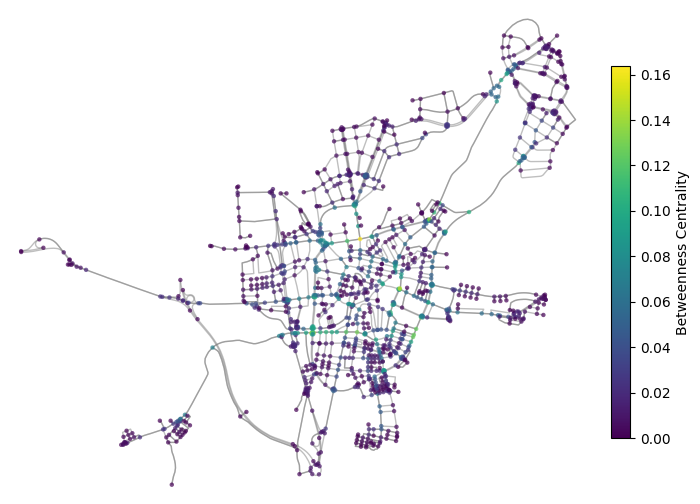

In [27]:
import matplotlib.pyplot as plt

# Compute betweenness centrality
betweenness = nx.betweenness_centrality(G_proj, normalized=True, weight='length')

# Assign betweenness as a node attribute
nx.set_node_attributes(G_proj, betweenness, 'betweenness')

# Visualize the graph
fig, ax = ox.plot_graph(
    G_proj, 
    node_color=[G_proj.nodes[n]['betweenness'] for n in G_proj.nodes()],
    node_size=10,
    node_alpha=0.7,
    edge_color='gray',
    edge_alpha=0.5,
    show=False,
    close=False,
    bgcolor='white'
)

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(betweenness.values()), vmax=max(betweenness.values())))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('Betweenness Centrality')

plt.show()

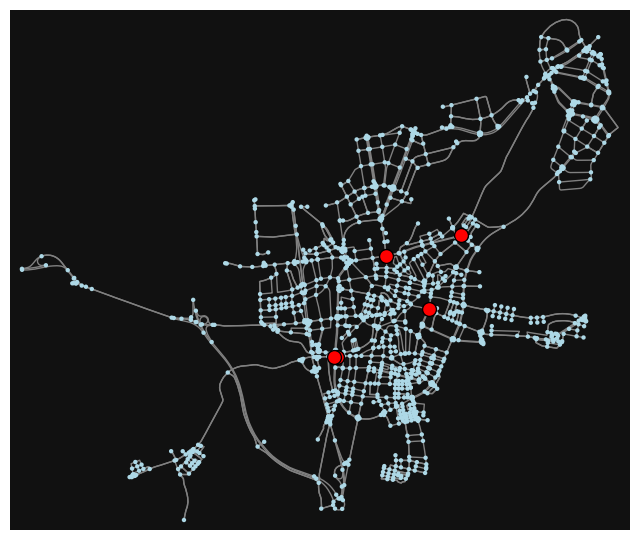

In [29]:
# Identify top 5 nodes by betweenness centrality
top_nodes = sorted(betweenness, key=betweenness.get, reverse=True)[:5]

# Extract node positions
node_x = [G_proj.nodes[n]['x'] for n in G_proj.nodes()]
node_y = [G_proj.nodes[n]['y'] for n in G_proj.nodes()]

# Plot the graph
fig, ax = ox.plot_graph(G_proj, node_size=10, node_color='lightblue', edge_color='gray', show=False, close=False)

# Highlight top nodes
for n in top_nodes:
    x = G_proj.nodes[n]['x']
    y = G_proj.nodes[n]['y']
    ax.scatter(x, y, c='red', s=100, edgecolors='black', zorder=5)

plt.show()

Computing betweenness centrality...
Betweenness centrality computed.
Visualizing the graph with betweenness centrality...


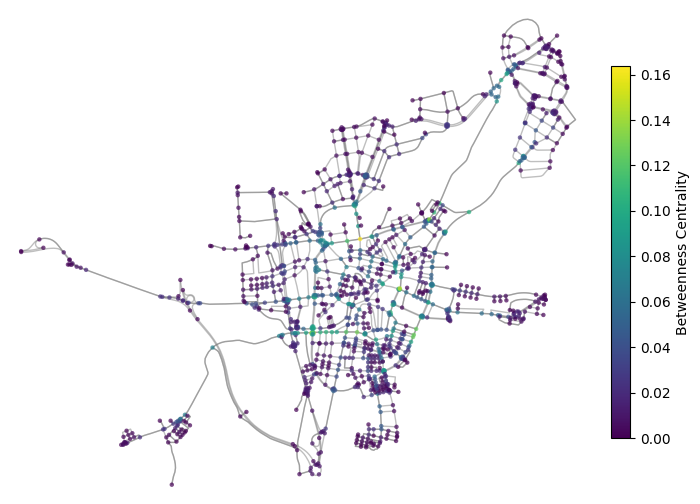

Top 5 nodes by betweenness centrality:
1. Node ID: 516347451, Betweenness Centrality: 0.1638
2. Node ID: 525882696, Betweenness Centrality: 0.1462
3. Node ID: 318198378, Betweenness Centrality: 0.1451
4. Node ID: 3149756903, Betweenness Centrality: 0.1400
5. Node ID: 3544271449, Betweenness Centrality: 0.1389


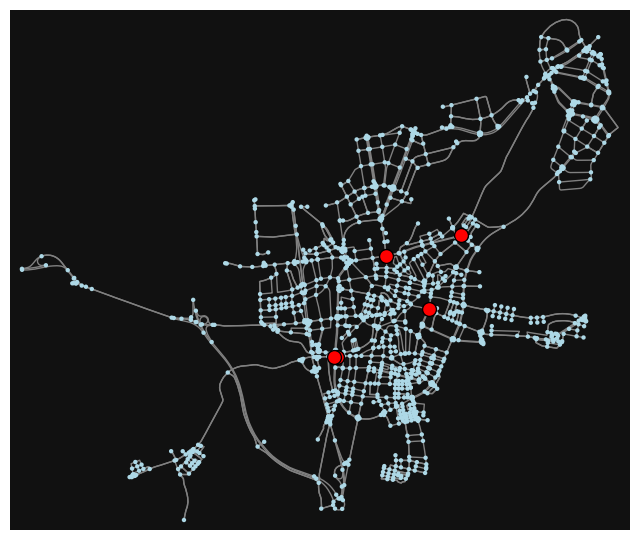

In [30]:
# 3. Compute betweenness centrality
print("Computing betweenness centrality...")
betweenness = nx.betweenness_centrality(G_proj, normalized=True, weight='length')
print("Betweenness centrality computed.")

# 4. Assign betweenness as a node attribute
nx.set_node_attributes(G_proj, betweenness, 'betweenness')

# 5. Visualize the graph with betweenness centrality
print("Visualizing the graph with betweenness centrality...")
fig, ax = ox.plot_graph(
    G_proj, 
    node_color=[G_proj.nodes[n]['betweenness'] for n in G_proj.nodes()],
    node_size=10,
    node_alpha=0.7,
    edge_color='gray',
    edge_alpha=0.5,
    bgcolor='white',
    show=False,
    close=False
)

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(betweenness.values()), vmax=max(betweenness.values())))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('Betweenness Centrality')

plt.show()

# 6. Identify and highlight top 5 nodes
top_n = 5
top_nodes = sorted(betweenness, key=betweenness.get, reverse=True)[:top_n]
print(f"Top {top_n} nodes by betweenness centrality:")

for i, node in enumerate(top_nodes, start=1):
    print(f"{i}. Node ID: {node}, Betweenness Centrality: {betweenness[node]:.4f}")

# Optional: Visualize top nodes
fig, ax = ox.plot_graph(
    G_proj, 
    node_color='lightblue', 
    node_size=10, 
    edge_color='gray',
    show=False, 
    close=False
)

for node in top_nodes:
    x = G_proj.nodes[node]['x']
    y = G_proj.nodes[node]['y']
    ax.scatter(x, y, c='red', s=100, edgecolors='black', zorder=5)

plt.show()


##### Edges

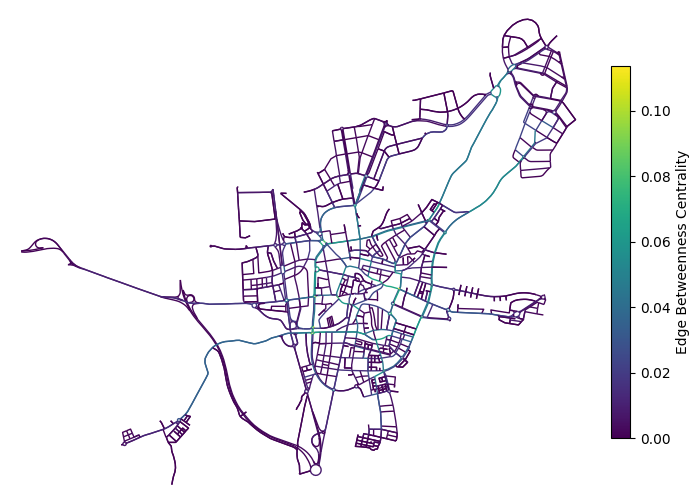

In [31]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

# 1. (Optional) Convert to MultiGraph or confirm you have one
#    If your G_proj is already a MultiGraph or MultiDiGraph, skip this step.
# G_proj = nx.MultiGraph(G_proj)

# 2. Compute edge betweenness centrality
edge_betweenness = nx.edge_betweenness_centrality(G_proj, normalized=True, weight='length')

# 3. Collect betweenness values by iterating with keys=True
all_edges = list(G_proj.edges(keys=True))  # list of (u, v, k)
edge_betweenness_values = [edge_betweenness[(u, v, k)] 
                           for (u, v, k) in all_edges]

# 4. Create a colormap
cmap = plt.cm.viridis
norm = colors.Normalize(
    vmin=min(edge_betweenness_values),
    vmax=max(edge_betweenness_values)
)
edge_colors = [cmap(norm(value)) for value in edge_betweenness_values]

# 5. Plot the graph with OSMnx, using the same ordering for edges
fig, ax = ox.plot_graph(
    G_proj,
    edge_color=edge_colors,
    edge_linewidth=1,
    node_size=0,
    bgcolor='white',
    show=False,
    close=False
)

# 6. Add a colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('Edge Betweenness Centrality')

plt.show()


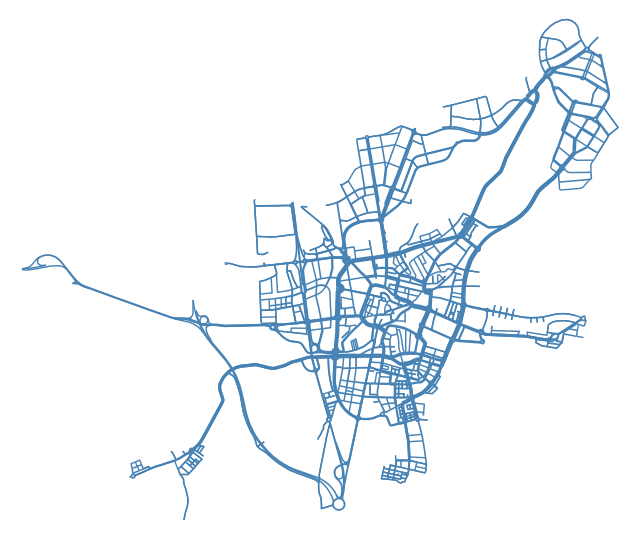

In [32]:
# Normalize betweenness for linewidth scaling
max_bet = max(edge_betweenness_values)
min_bet = min(edge_betweenness_values)
edge_widths = [1 + 4 * ((bet - min_bet) / (max_bet - min_bet)) for bet in edge_betweenness_values]

# Plot the graph with varying edge widths
fig, ax = ox.plot_graph(
    G_proj,
    edge_color='steelblue',
    edge_linewidth=edge_widths,
    node_size=0,  # Hide nodes for clarity
    bgcolor='white',
    show=False,
    close=False
)

# Optionally, add a legend or annotation for linewidth scaling

plt.show()


### Street angle orientation

#### Bearing

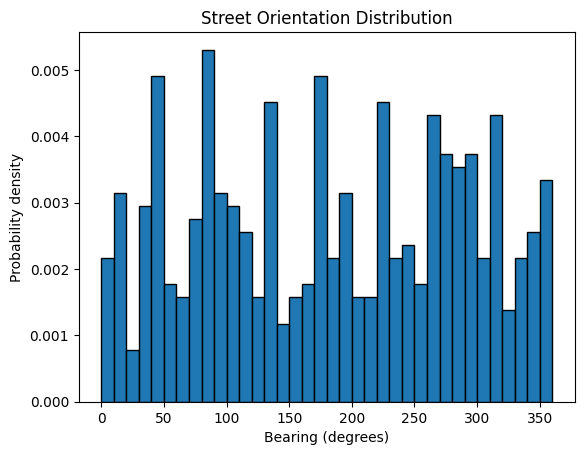

In [33]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np

# 1. Download (or load) a street network
place = "Martorelles, Catalunya, Spain"
G = ox.graph_from_place(place, network_type="drive")

# 3. Add edge bearings (in degrees) to each edge's attributes
G = ox.bearing.add_edge_bearings(G)

# 4. Convert edges to a GeoDataFrame
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

# The bearing has been added to the edge attributes under the key "bearing"
orientations = edges["bearing"]  # In degrees from North, going clockwise

# 5. Bin these bearings to create an orientation histogram
num_bins = 36
counts, bin_edges = np.histogram(orientations, bins=num_bins, range=(0,360), density=True)

# 6. (Optional) Plot as a simple histogram, or use matplotlib’s polar plotting
plt.bar(bin_edges[:-1], counts, width=360/num_bins, edgecolor='k', align='edge')
plt.xlabel("Bearing (degrees)")
plt.ylabel("Probability density")
plt.title("Street Orientation Distribution")
plt.show()


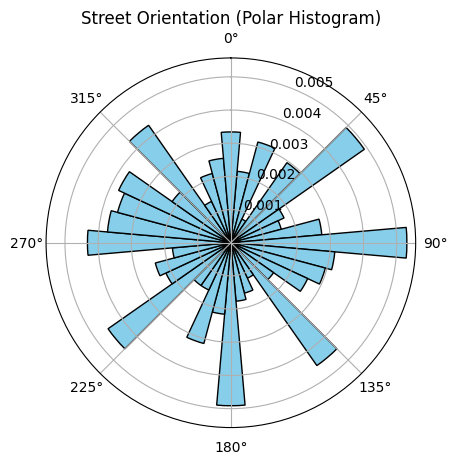

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Suppose bin_edges is length num_bins+1, and counts is length num_bins
theta_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])  # midpoint of each bin, in degrees
theta_radians = np.radians(theta_centers)               # convert to radians

# A polar bar chart
fig = plt.figure()
ax = fig.add_subplot(projection='polar')

# 'counts' can be probability density or absolute frequency
ax.bar(theta_radians, counts, 
       width=np.radians(360/num_bins), 
       bottom=0.0, 
       color='skyblue', 
       edgecolor='k', 
       align='edge')

ax.set_theta_direction(-1)   # make angles go clockwise
ax.set_theta_offset(np.radians(90))  # 0° at top
plt.title("Street Orientation (Polar Histogram)")
plt.show()


#### Orientation entropy

In [35]:
import math

# 1. Compute your city's orientation entropy
H0 = ox.bearing.orientation_entropy(ox.convert.to_undirected(G), num_bins=36, weight=None)

# 2. Define H_max and H_g
H_max = math.log(36)  # ~3.584913
H_g   = 1.386         # Boeing's "perfect 4-way grid" entropy in nats

# 3. Compute phi
phi = 1.0 - ((H0 - H_g) / (H_max - H_g))**2

print(f"Orientation-order phi = {phi:.4f}")

Orientation-order phi = 0.1014


## Province/vagueria aggregation

In [74]:
import pandas as pd

# Llista de capitals de comarca amb les seves províncies i vegueries
data = {
    "Capital": [
        "Barcelona", "Girona", "Lleida", "Tarragona", "Mataró", "Sabadell", 
        "Terrassa", "Manresa", "Vic", "Igualada", "Vilafranca del Penedès", "Vilanova i la Geltrú", 
        "el Vendrell", "Reus", "Tortosa", "Amposta", "Gandesa", "Falset", "Montblanc", 
        "Valls", "Balaguer", "Cervera", "Solsona", "la Seu d'Urgell", "Sort", "Tremp", 
        "el Pont de Suert", "Mollerussa", "les Borges Blanques", "Tàrrega", 
        "Olot", "Ripoll", "Puigcerdà", "Banyoles", "la Bisbal d'Empordà", "Santa Coloma de Farners",
        "Figueres", "Vielha e Mijaran", "Berga", "Sant Feliu de Llobregat", "Granollers", "Móra d'Ebre",
        "Prats de Lluçanès", "Moià"
    ],
     "Provincia": [
        "Barcelona", "Girona", "Lleida", "Tarragona", "Barcelona", "Barcelona", 
        "Barcelona", "Barcelona", "Barcelona", "Barcelona", "Barcelona", "Barcelona", 
        "Tarragona", "Tarragona", "Tarragona", "Tarragona", "Tarragona", "Tarragona", 
        "Tarragona", "Tarragona", "Lleida", "Lleida", "Lleida", "Lleida", "Lleida", 
        "Lleida", "Lleida", "Lleida", "Lleida", "Lleida", 
        "Girona", "Girona", "Girona", "Girona", "Girona", "Girona", 
        "Girona", "Lleida", "Barcelona", "Barcelona", "Barcelona", "Tarragona",
        "Barcelona", "Barcelona"
    ],
    "Vegueria": [
        "Barcelona", "Girona", "Lleida", "Camp de Tarragona", "Barcelona", "Barcelona", 
        "Barcelona", "Catalunya Central", "Catalunya Central", "Catalunya Central", "Penedès", "Penedès", 
        "Penedès", "Camp de Tarragona", "Terres de l'Ebre", "Terres de l'Ebre", "Terres de l'Ebre", "Camp de Tarragona", 
        "Camp de Tarragona", "Camp de Tarragona", "Lleida", "Lleida", "Catalunya Central", "Alt Pirineu i Aran", "Alt Pirineu i Aran", 
        "Alt Pirineu i Aran", "Alt Pirineu i Aran", "Lleida", "Lleida", "Lleida", 
        "Girona", "Girona", "Alt Pirineu i Aran", "Girona", "Girona", "Girona", 
        "Girona", "Alt Pirineu i Aran", "Catalunya Central", "Barcelona", "Barcelona", "Terres de l'Ebre",
        "Catalunya Central", "Catalunya Central"
    ]
}

# Crear DataFrame amb la informació de les províncies i les vegueries
df_info = pd.DataFrame(data)

In [75]:
#list every capital of comarca with its respective province and vegueria
print(df_info)

                    Capital  Provincia            Vegueria
0                 Barcelona  Barcelona           Barcelona
1                    Girona     Girona              Girona
2                    Lleida     Lleida              Lleida
3                 Tarragona  Tarragona   Camp de Tarragona
4                    Mataró  Barcelona           Barcelona
5                  Sabadell  Barcelona           Barcelona
6                  Terrassa  Barcelona           Barcelona
7                   Manresa  Barcelona   Catalunya Central
8                       Vic  Barcelona   Catalunya Central
9                  Igualada  Barcelona   Catalunya Central
10   Vilafranca del Penedès  Barcelona             Penedès
11     Vilanova i la Geltrú  Barcelona             Penedès
12              el Vendrell  Tarragona             Penedès
13                     Reus  Tarragona   Camp de Tarragona
14                  Tortosa  Tarragona    Terres de l'Ebre
15                  Amposta  Tarragona    Terres de l'Eb

In [98]:
# Llegir el fitxer metrics.csv
df_metrics = pd.read_csv('metrics.csv')

# Unir les dades de metrics.csv amb la informació de les províncies i les vegueries
df = pd.merge(df_metrics, df_info, on="Capital")

# Mostrar la taula final
print(df)

                    Capital  Number of Nodes  Average Node Degree  \
0                 Barcelona             8885             3.712099   
1                    Girona             2104             4.173004   
2                    Lleida             3240             4.178395   
3                 Tarragona             2768             3.890896   
4                    Mataró             1718             3.924331   
5                  Sabadell             3144             4.001908   
6                  Terrassa             3654             3.844554   
7                   Manresa             1524             3.854331   
8                       Vic             1295             4.012355   
9                  Igualada              982             4.226069   
10   Vilafranca del Penedès              787             4.094028   
11     Vilanova i la Geltrú             1614             3.728625   
12              el Vendrell             2153             4.473758   
13                     Reus       

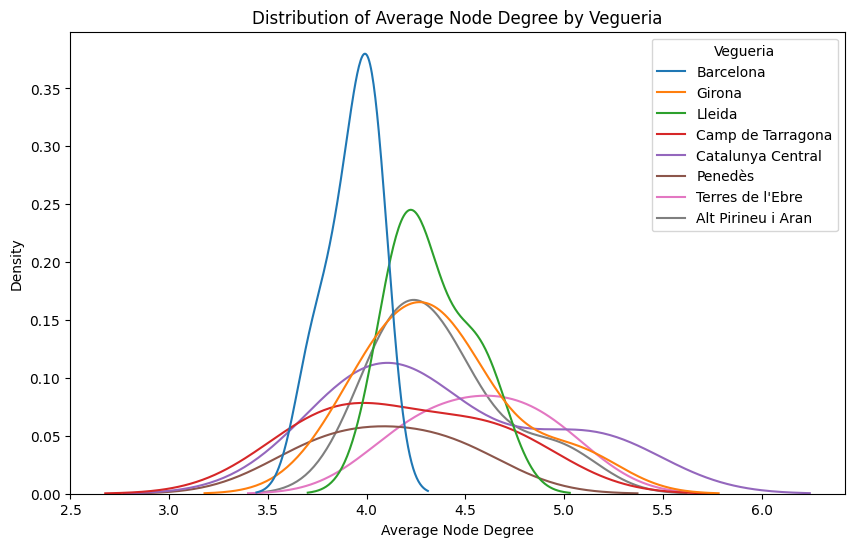

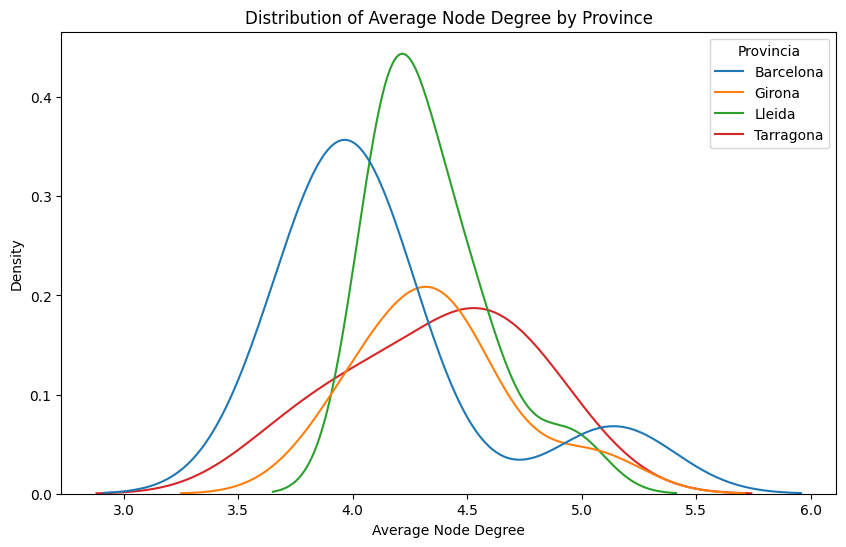

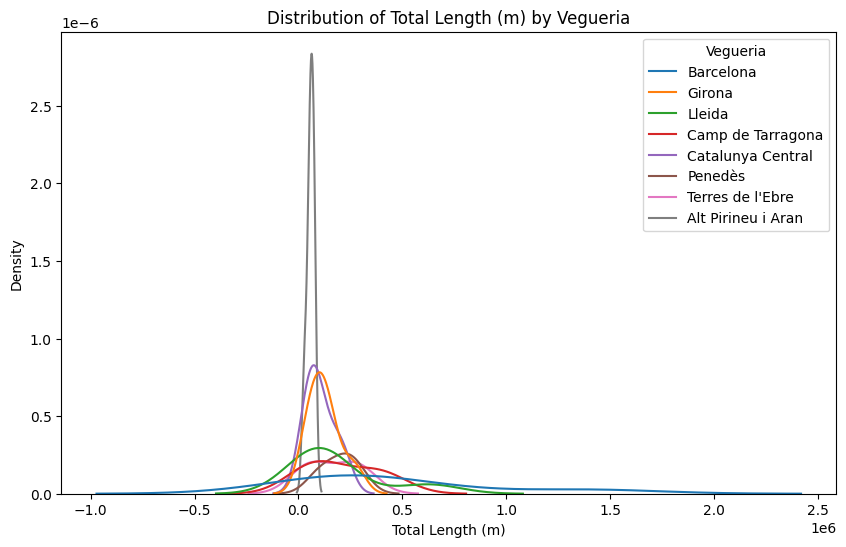

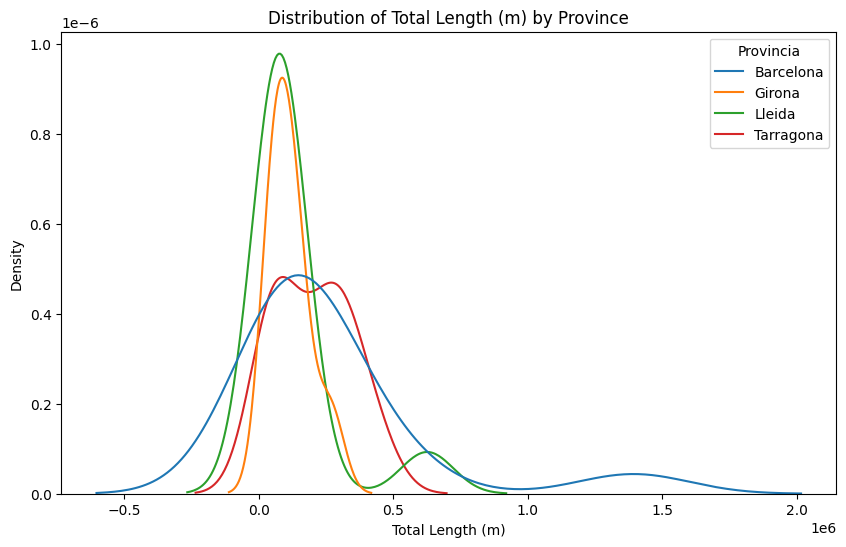

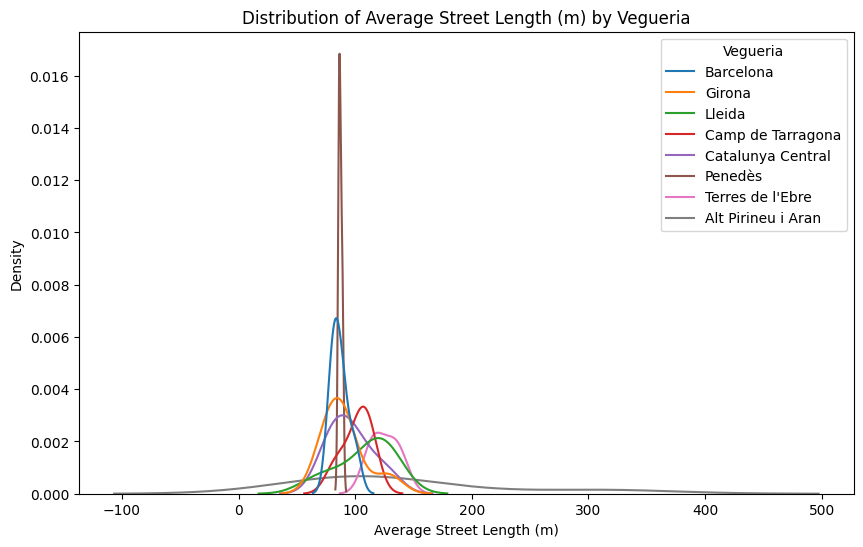

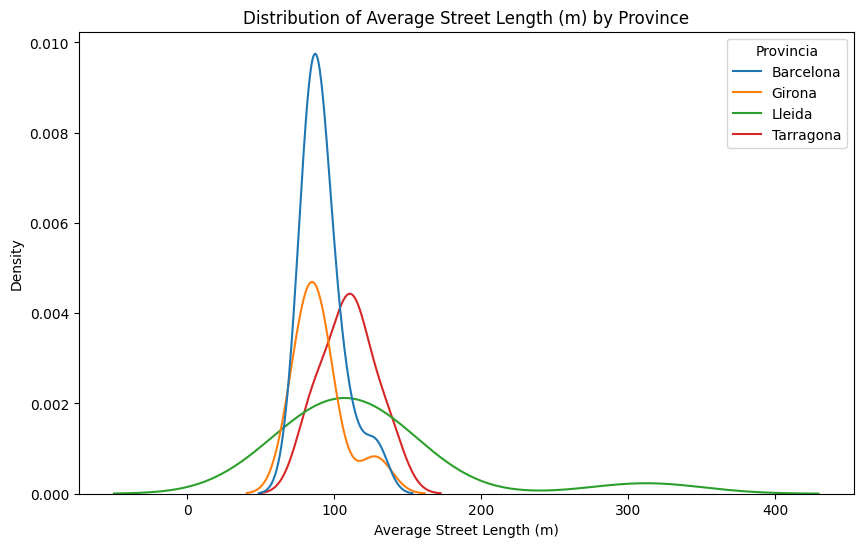

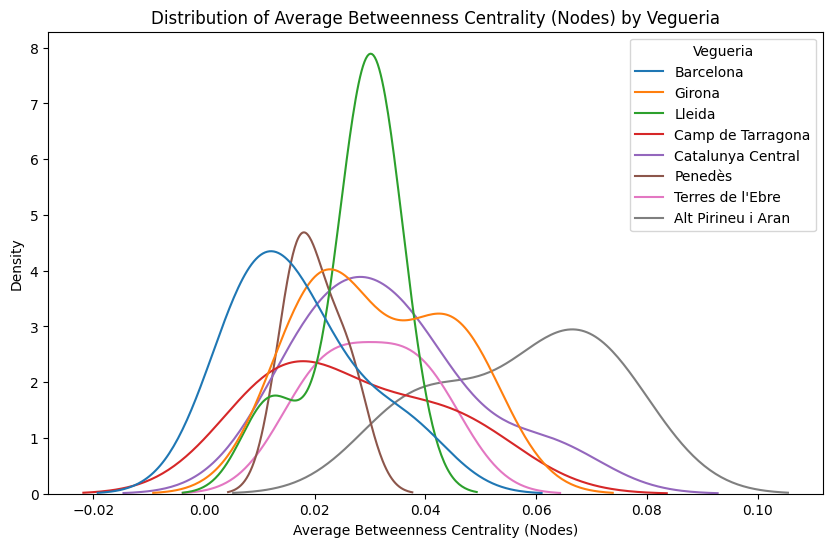

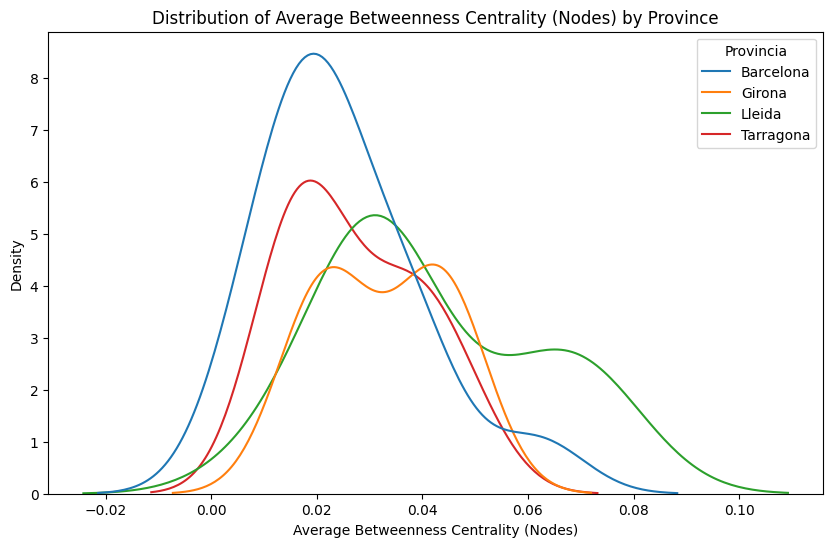

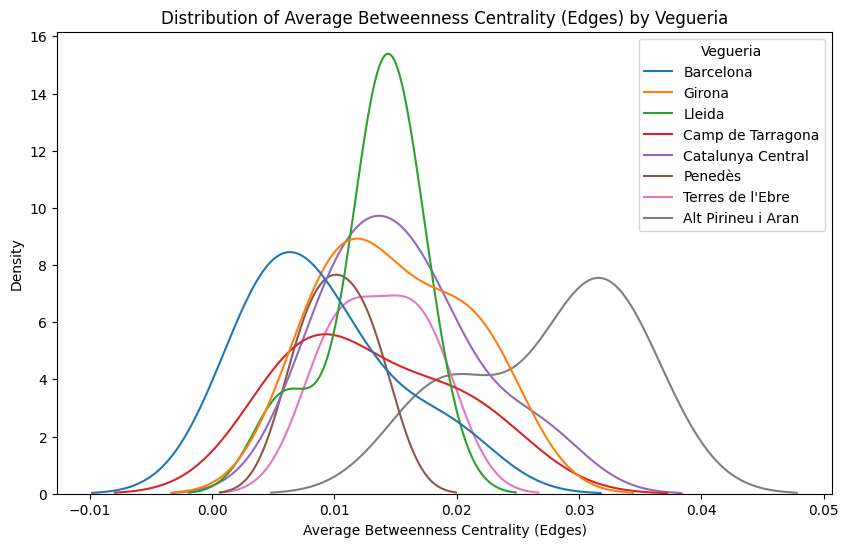

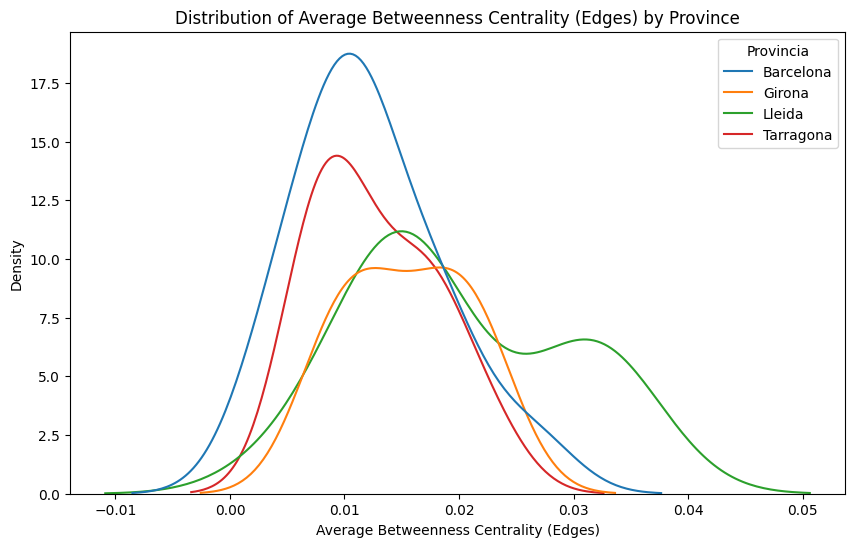

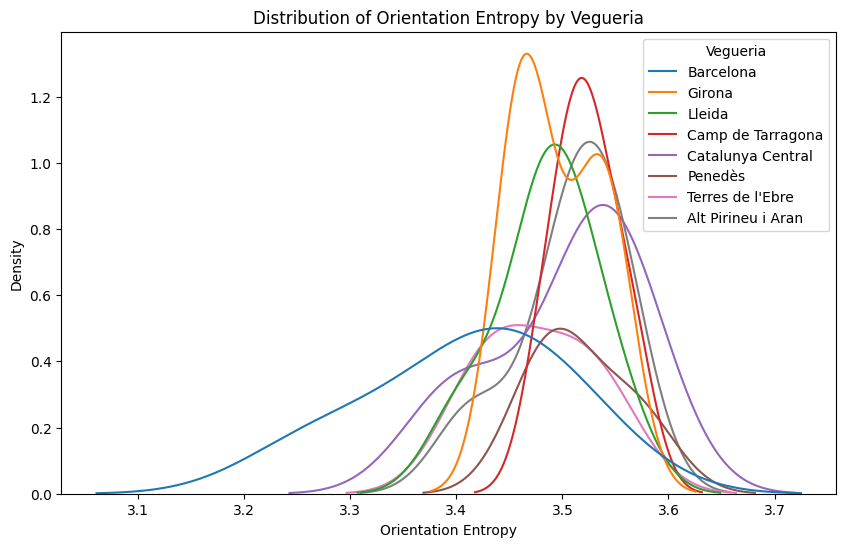

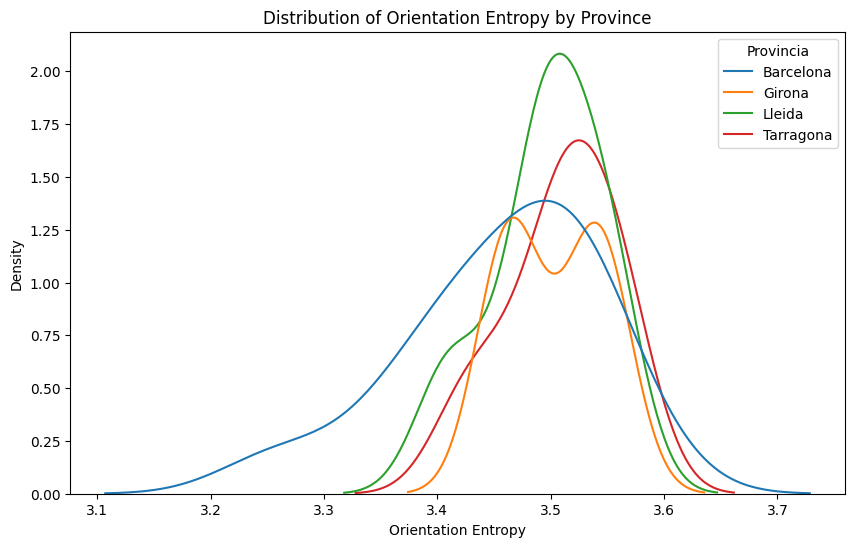

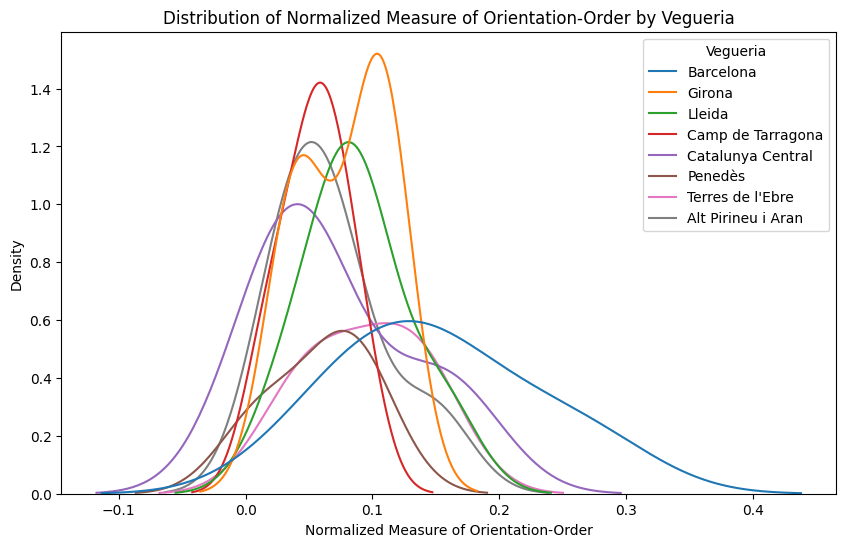

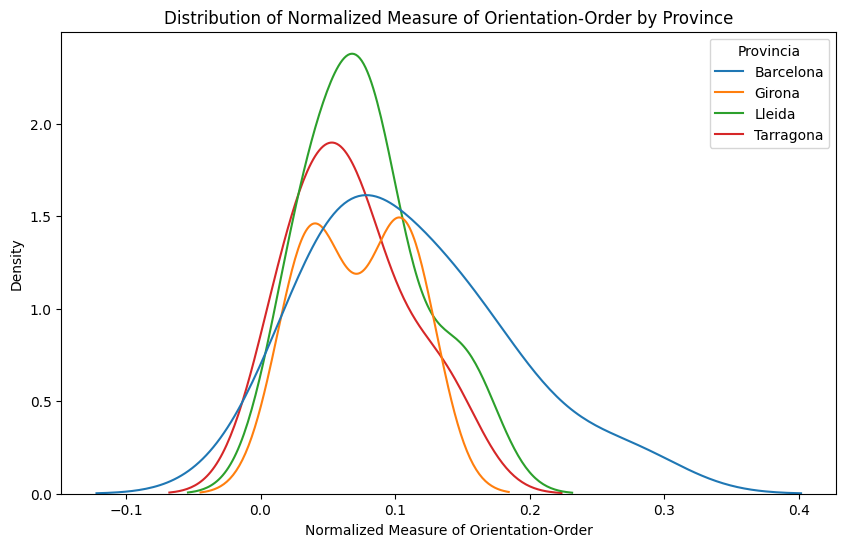

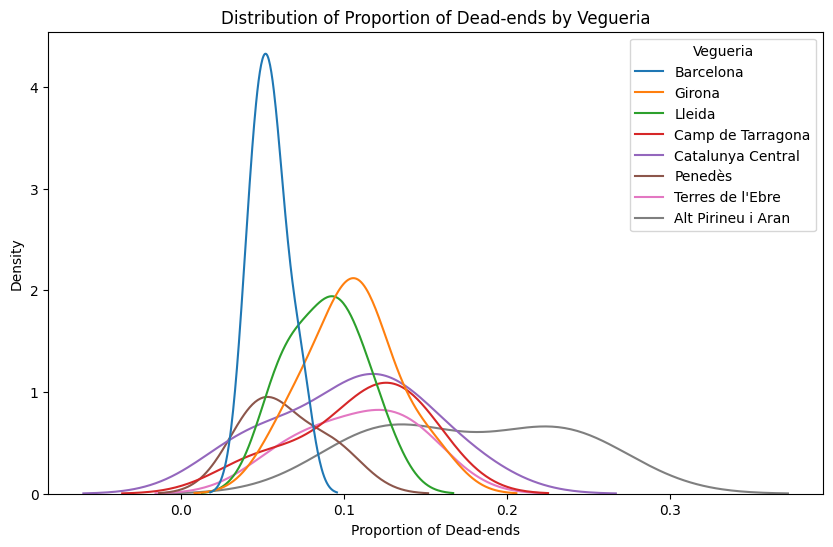

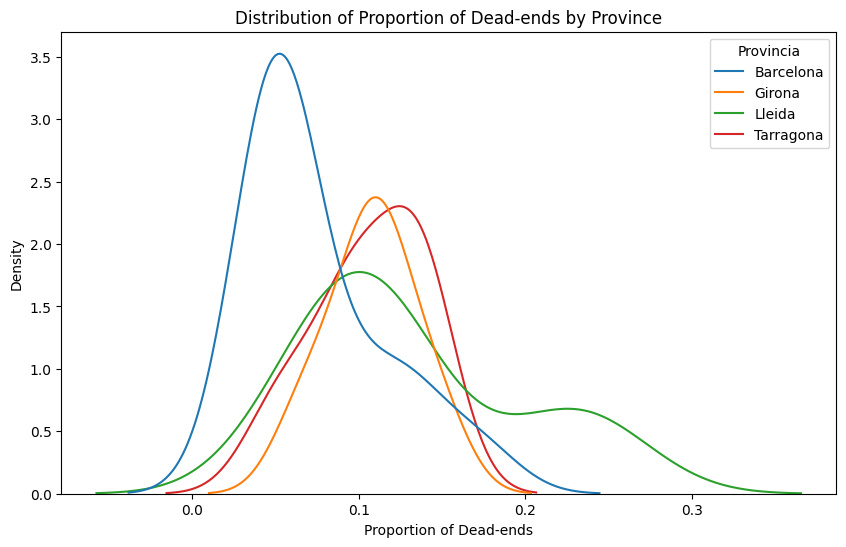

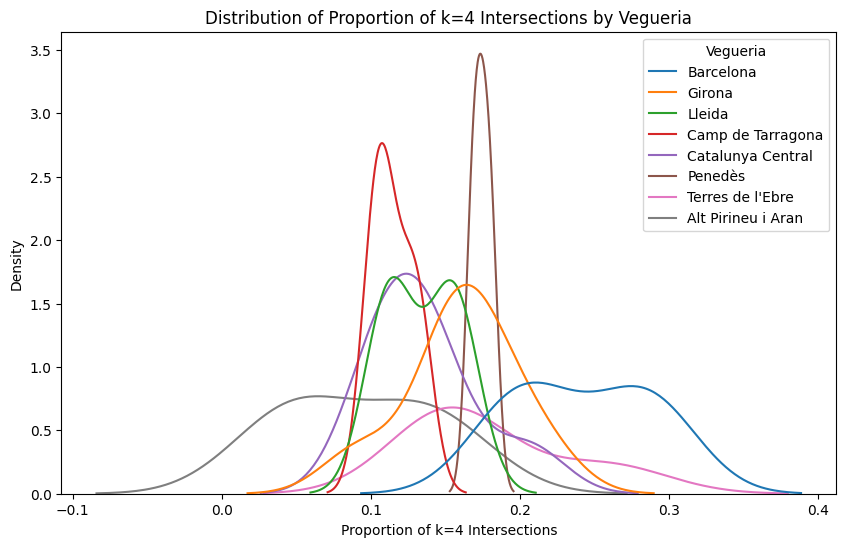

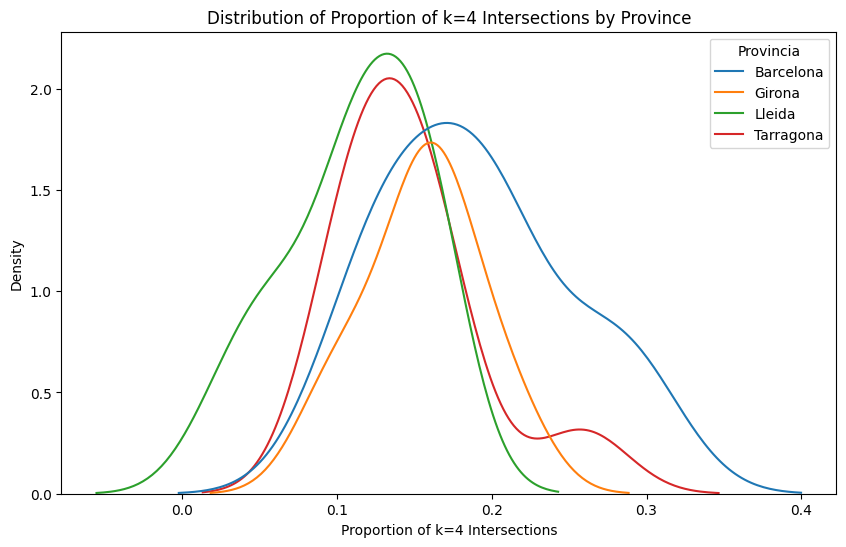

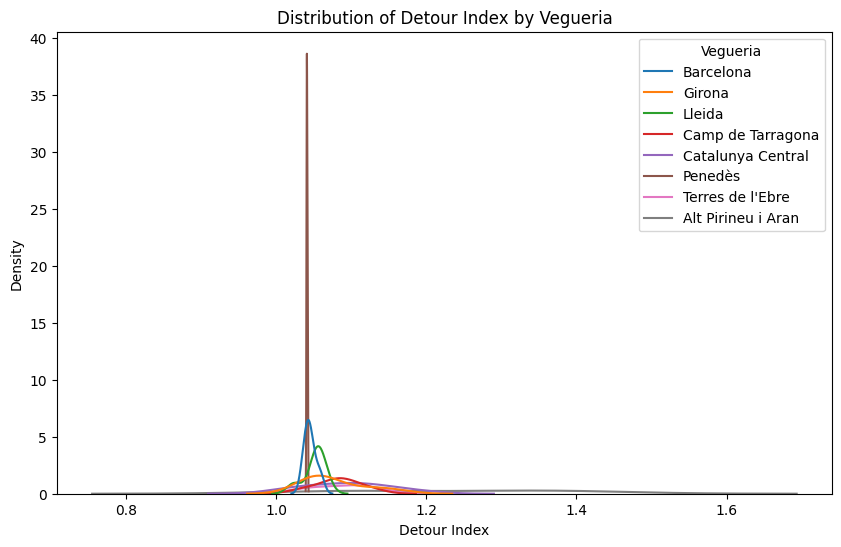

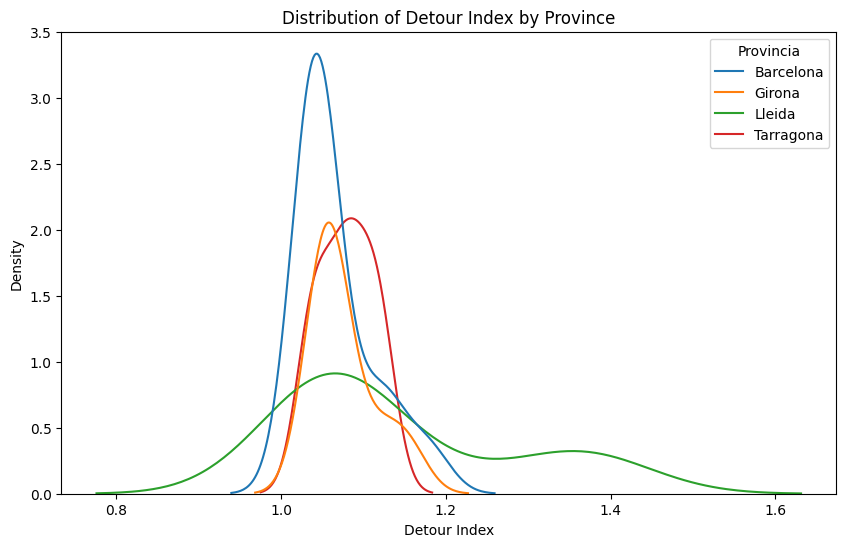

In [ ]:
#Create a graph of the probability density function of the phi metric for the capitals of comarca separated by vegueria
import seaborn as sns

#for all measures create a graph of the probability density function of the phi metric for the capitals of comarca separated by vegueria and province
for measure in df.columns[2:12]:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.kdeplot(data=df, x=measure, hue="Vegueria", ax=ax)
    ax.set_title(f"Distribution of {measure} by Vegueria")
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.kdeplot(data=df, x=measure, hue="Provincia", ax=ax)
    ax.set_title(f"Distribution of {measure} by Province")
    plt.show()


In [102]:
#calculate mean of the metrics by vegueria
df_vegureia=df.drop(columns=["Capital","Provincia"])
df_vegueria = df_vegureia.groupby("Vegueria",).mean().reset_index()

#calculate mean of the metrics by province
df_province=df.drop(columns=["Capital","Vegueria"])
df_province = df_province.groupby("Provincia",).mean().reset_index()

In [103]:
#show the mean of the metrics by vegueria
print(df_vegueria)

#show the mean of the metrics by province
print(df_province)

             Vegueria  Number of Nodes  Average Node Degree  Total Length (m)  \
0  Alt Pirineu i Aran       350.166667             4.372079      58041.916131   
1           Barcelona      3143.000000             3.926395     450851.820784   
2   Camp de Tarragona      1500.600000             4.184480     211080.498492   
3   Catalunya Central       770.142857             4.396804     104289.651952   
4              Girona       987.000000             4.360172     125262.786331   
5              Lleida      1089.333333             4.324336     186989.138970   
6             Penedès      1518.000000             4.098803     197844.692572   
7    Terres de l'Ebre       864.250000             4.575013     167274.671684   

   Average Street Length (m)  Average Betweenness Centrality (Nodes)  \
0                 140.262709                                0.057618   
1                  86.858873                                0.017019   
2                 101.464693                          

## Clustering

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Read the metrics.csv file
df_metrics = pd.read_csv('metrics.csv')

# Select the columns to be used for clustering
columns_to_cluster = [
    "Number of Nodes", "Number of Edges", "Average Node Degree", "Total Length (m)", 
    "Average Edge Length (m)", "Betweenness Centrality (Nodes)", "Betweenness Centrality (Edges)", 
    "Orientation Entropy", "Proportion of Dead-ends", "Proportion of k=4 Intersections", "Detour Index"
]

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(df_metrics.drop(columns=("Capital")))

#print the dendogram
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'),labels=df_metrics['Capital'].values)
plt.title('Dendrogram with ward linkage')
plt.xlabel('Capitals')
plt.ylabel('Euclidean distances')
plt.show()

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method='single'),labels=df_metrics['Capital'].values)
plt.title('Dendrogram with single linkage')
plt.xlabel('Capitals')
plt.ylabel('Euclidean distances')
plt.show()

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'),labels=df_metrics['Capital'].values)
plt.title('Dendrogram with complete linkage')
plt.xlabel('Capitals')
plt.ylabel('Euclidean distances')
plt.show()

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method='average'),labels=df_metrics['Capital'].values)
plt.title('Dendrogram with average linkage')
plt.xlabel('Capitals')
plt.ylabel('Euclidean distances')
plt.show()

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method='centroid'),labels=df_metrics['Capital'].values)
plt.title('Dendrogram with centroid linkage')
plt.xlabel('Capitals')
plt.ylabel('Euclidean distances')
plt.show()

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method='weighted'),labels=df_metrics['Capital'].values)
plt.title('Dendrogram with weighted linkage')
plt.xlabel('Capitals')
plt.ylabel('Euclidean distances')
plt.show()

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method='median'),labels=df_metrics['Capital'].values)
plt.title('Dendrogram with median linkage')
plt.xlabel('Capitals')
plt.ylabel('Euclidean distances')
plt.show()


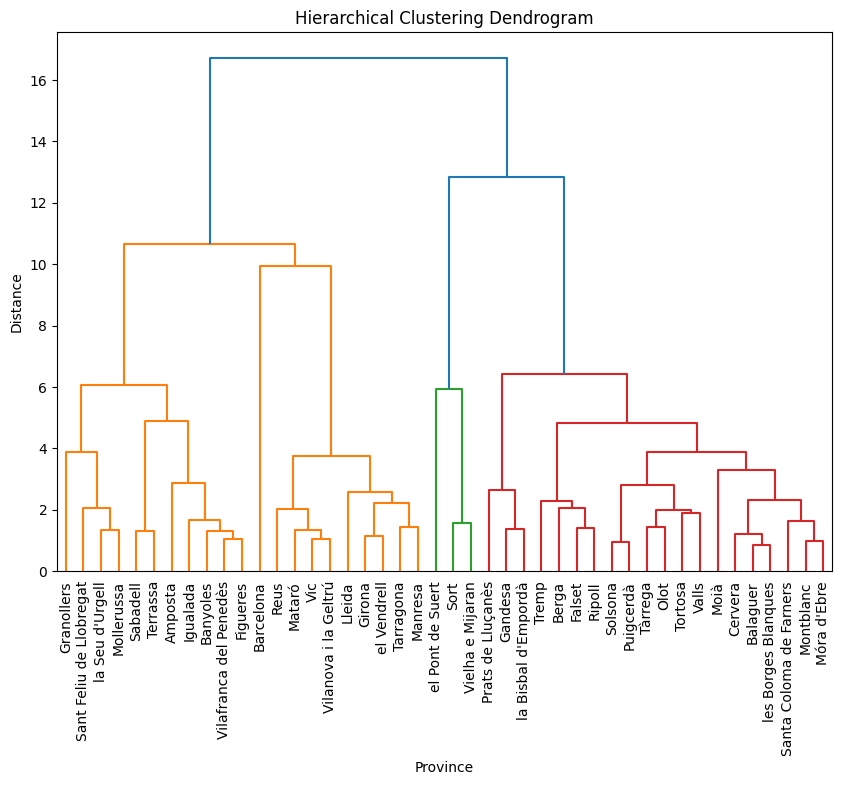

In [112]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import matplotlib.pyplot as plt

# Select the features for clustering
scaler = StandardScaler()
X = scaler.fit_transform(df_metrics.drop(columns=("Capital")))

# Perform hierarchical/agglomerative clustering using Ward's method
Z = linkage(X, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df_metrics['Capital'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Province')
plt.ylabel('Distance')
plt.show()

# Choose the number of clusters
max_d = 150  # This is an example threshold, you can adjust it based on the dendrogram
clusters = fcluster(Z, max_d, criterion='distance')


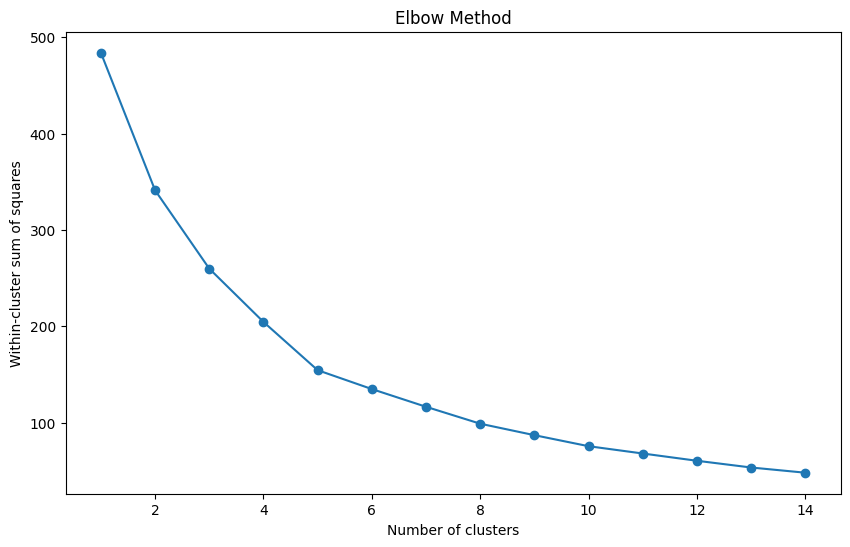

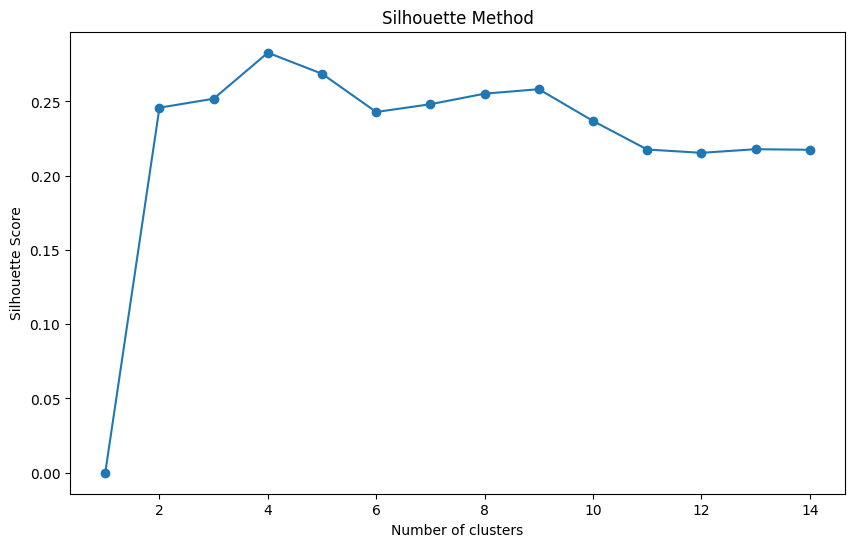

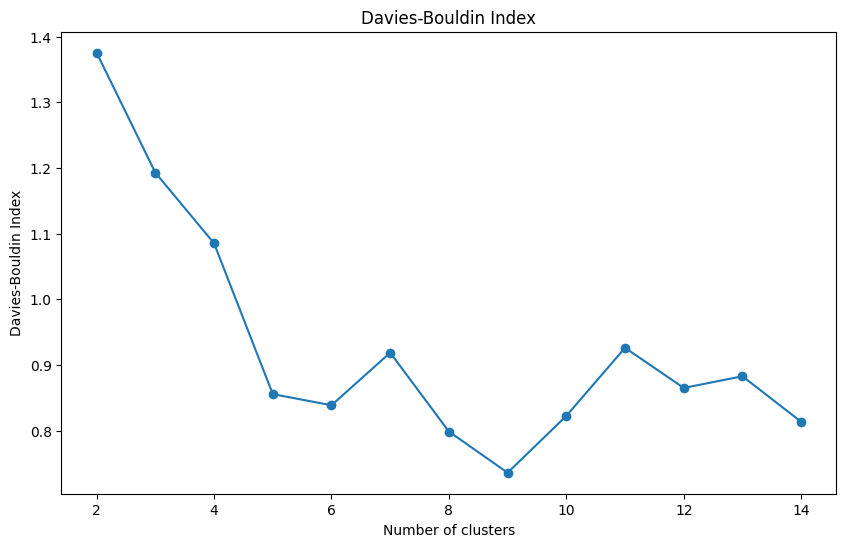

In [118]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Read the metrics.csv file
df_metrics = pd.read_csv('metrics.csv')

# Select the columns to be used for clustering


# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(df_metrics.drop(columns=("Capital")))

# Perform hierarchical/agglomerative clustering using Ward's method
Z = linkage(X, method='ward', metric='euclidean')

# Elbow Method
wcss = []
k_range = range(1, 15)
for k in k_range:
    clusters = fcluster(Z, k, criterion='maxclust')
    centroids = np.array([X[clusters == i].mean(axis=0) for i in range(1, k+1)])
    wcss.append(sum(np.min(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)**2))

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow Method')
plt.show()

# Silhouette Method
silhouette_scores = []
for k in k_range:
    clusters = fcluster(Z, k, criterion='maxclust')
    if k > 1:
        score = silhouette_score(X, clusters)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(0)  # Silhouette score is not defined for k=1

# Plot the Silhouette Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

# Davies-Bouldin Index
davies_bouldin_scores = []
for k in k_range:
    clusters = fcluster(Z, k, criterion='maxclust')
    if k > 1:
        score = davies_bouldin_score(X, clusters)
        davies_bouldin_scores.append(score)
    else:
        davies_bouldin_scores.append(float('inf'))  # Davies-Bouldin score is not defined for k=1

# Plot the Davies-Bouldin Index
plt.figure(figsize=(10, 6))
plt.plot(k_range, davies_bouldin_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index')
plt.show()

Interpret elbow. The first point where there is a significant change of direction is 2 and 5

Silouhette suggests 4 (maximal point)

Davies Bouldin suggests 9 (minimal point)

In [119]:
# Perform hierarchical/agglomerative clustering using Ward's method
Z = linkage(X, method='ward', metric='euclidean')

# Choose the number of clusters
num_clusters = 5
clusters = fcluster(Z, num_clusters, criterion='maxclust')

# Add the cluster labels to the dataframe
df_metrics['Cluster'] = clusters

# Save the dataframe with cluster labels to a CSV file
df_metrics.to_csv('ward_clusters_5.csv', index=False)

# Display the dataframe with cluster labels
print(df_metrics)

                    Capital  Number of Nodes  Average Node Degree  \
0                 Barcelona             8885             3.712099   
1                    Girona             2104             4.173004   
2                    Lleida             3240             4.178395   
3                 Tarragona             2768             3.890896   
4                    Mataró             1718             3.924331   
5                  Sabadell             3144             4.001908   
6                  Terrassa             3654             3.844554   
7                   Manresa             1524             3.854331   
8                       Vic             1295             4.012355   
9                  Igualada              982             4.226069   
10   Vilafranca del Penedès              787             4.094028   
11     Vilanova i la Geltrú             1614             3.728625   
12              el Vendrell             2153             4.473758   
13                     Reus       

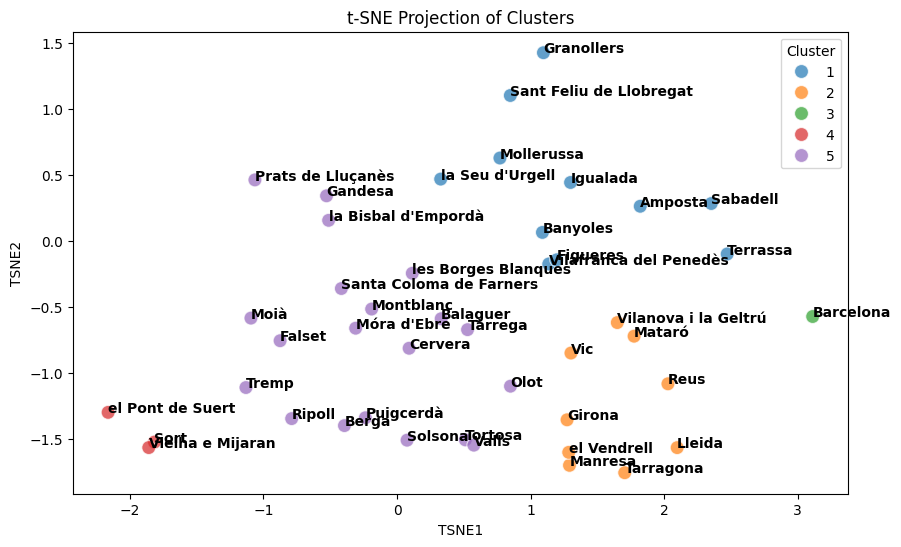

In [124]:
from sklearn.manifold import TSNE
import seaborn as sns

# Perform t-SNE projection
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Add the t-SNE components to the dataframe
df_metrics['TSNE1'] = X_tsne[:, 0]
df_metrics['TSNE2'] = X_tsne[:, 1]

# Plot the t-SNE projection with clusters and annotate some points
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df_metrics, x='TSNE1', y='TSNE2', hue='Cluster', palette='tab10', s=100, alpha=0.7)

# Annotate all points with city names
for i, point in df_metrics.iterrows():
    plt.text(point['TSNE1'], point['TSNE2'], point['Capital'], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('t-SNE Projection of Clusters')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend(title='Cluster')
plt.show()


### Clustering only with  average node degree, orientation indicator, median street segment length i average circuitry

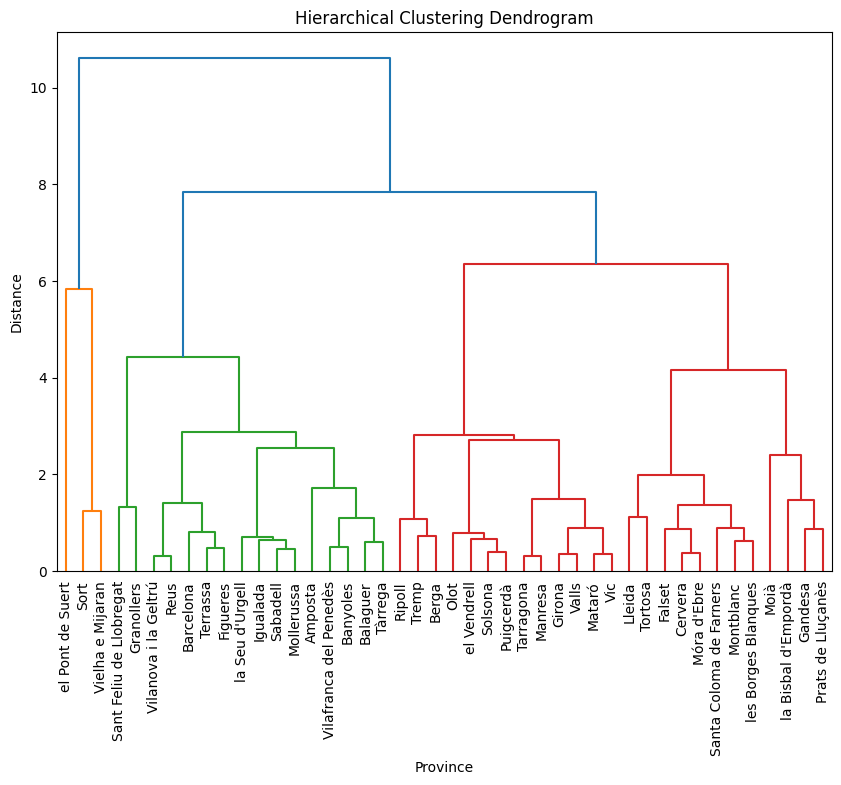

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import pandas as pd

df_metrics = pd.read_csv('metrics.csv')

# Select the features for clustering
scaler = StandardScaler()
X = scaler.fit_transform(df_metrics[["Average Node Degree", "Normalized Measure of Orientation-Order","Average Street Length (m)","Detour Index"]])

# Perform hierarchical/agglomerative clustering using Ward's method
Z = linkage(X, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df_metrics['Capital'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Province')
plt.ylabel('Distance')
plt.show()

# Choose the number of clusters
max_d = 150  # This is an example threshold, you can adjust it based on the dendrogram
clusters = fcluster(Z, max_d, criterion='distance')


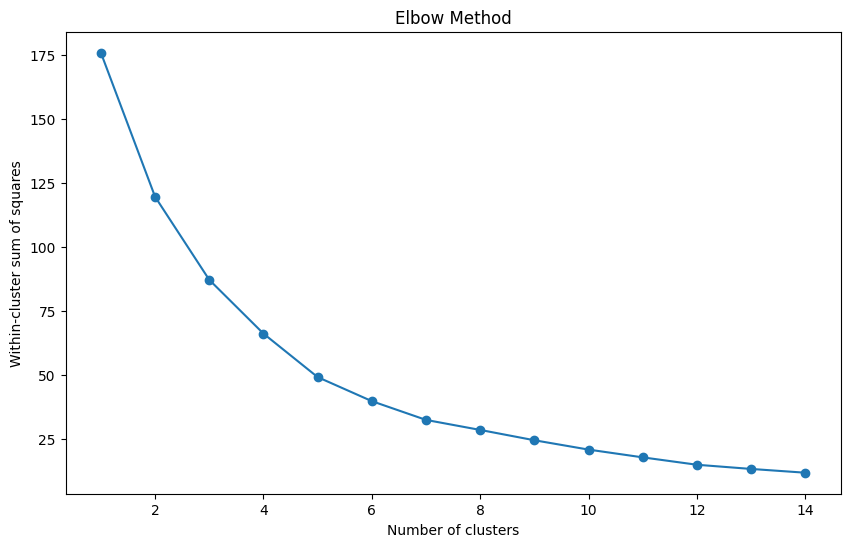

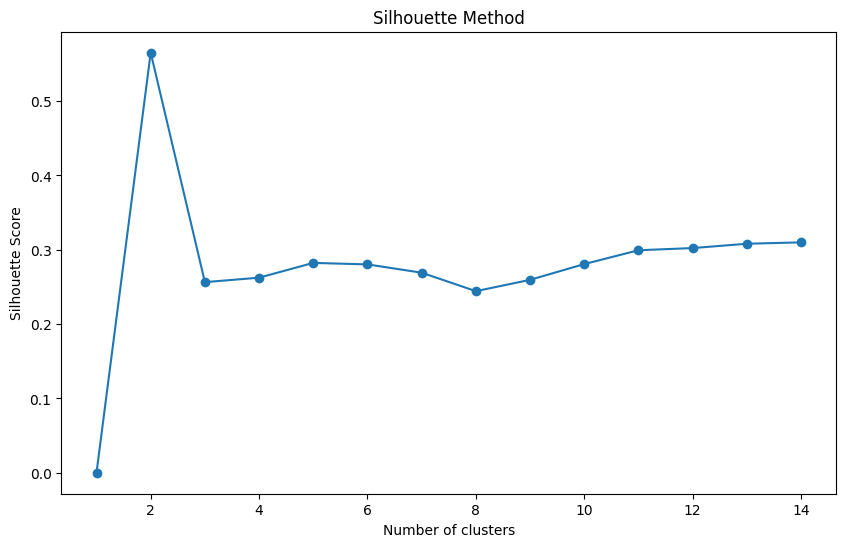

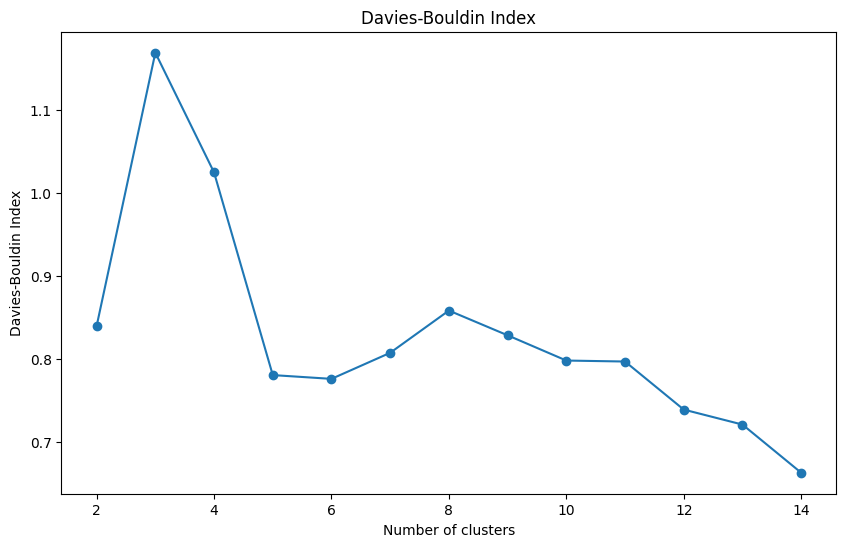

In [7]:
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Elbow Method
wcss = []
k_range = range(1, 15)
for k in k_range:
    clusters = fcluster(Z, k, criterion='maxclust')
    centroids = np.array([X[clusters == i].mean(axis=0) for i in range(1, k+1)])
    wcss.append(sum(np.min(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)**2))

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow Method')
plt.show()

# Silhouette Method
silhouette_scores = []
for k in k_range:
    clusters = fcluster(Z, k, criterion='maxclust')
    if k > 1:
        score = silhouette_score(X, clusters)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(0)  # Silhouette score is not defined for k=1

# Plot the Silhouette Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

# Davies-Bouldin Index
davies_bouldin_scores = []
for k in k_range:
    clusters = fcluster(Z, k, criterion='maxclust')
    if k > 1:
        score = davies_bouldin_score(X, clusters)
        davies_bouldin_scores.append(score)
    else:
        davies_bouldin_scores.append(float('inf'))  # Davies-Bouldin score is not defined for k=1

# Plot the Davies-Bouldin Index
plt.figure(figsize=(10, 6))
plt.plot(k_range, davies_bouldin_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index')
plt.show()

From avobe we choose 5 again

In [8]:
# Perform hierarchical/agglomerative clustering using Ward's method
Z = linkage(X, method='ward', metric='euclidean')

# Choose the number of clusters
num_clusters = 5
clusters = fcluster(Z, num_clusters, criterion='maxclust')

# Add the cluster labels to the dataframe
df_metrics['Cluster'] = clusters

# Save the dataframe with cluster labels to a CSV file
df_metrics.to_csv('ward_clusters_5_2.csv', index=False)

# Display the dataframe with cluster labels
print(df_metrics)

                    Capital  Number of Nodes  Average Node Degree  \
0                 Barcelona             8885             3.712099   
1                    Girona             2104             4.173004   
2                    Lleida             3240             4.178395   
3                 Tarragona             2768             3.890896   
4                    Mataró             1718             3.924331   
5                  Sabadell             3144             4.001908   
6                  Terrassa             3654             3.844554   
7                   Manresa             1524             3.854331   
8                       Vic             1295             4.012355   
9                  Igualada              982             4.226069   
10   Vilafranca del Penedès              787             4.094028   
11     Vilanova i la Geltrú             1614             3.728625   
12              el Vendrell             2153             4.473758   
13                     Reus       

c:\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


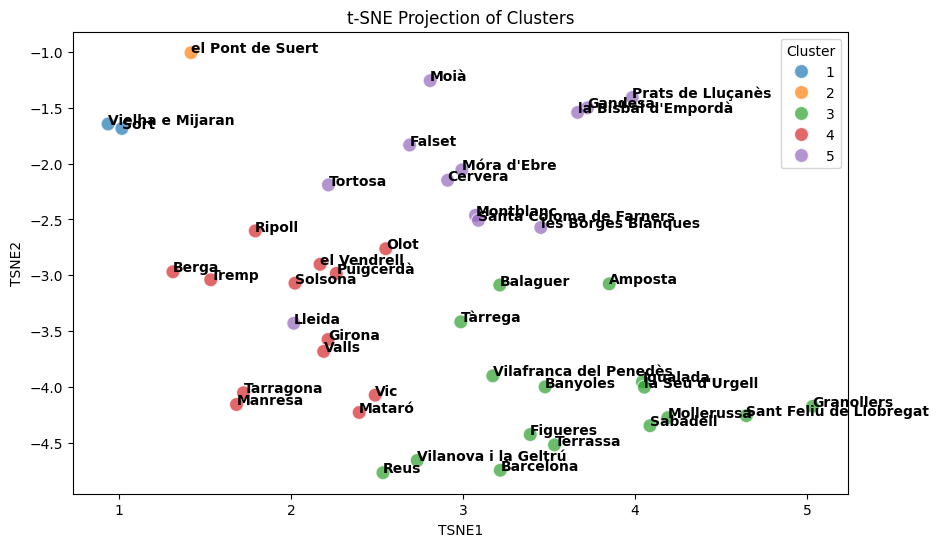

In [9]:
from sklearn.manifold import TSNE
import seaborn as sns

# Perform t-SNE projection
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Add the t-SNE components to the dataframe
df_metrics['TSNE1'] = X_tsne[:, 0]
df_metrics['TSNE2'] = X_tsne[:, 1]

# Plot the t-SNE projection with clusters and annotate some points
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df_metrics, x='TSNE1', y='TSNE2', hue='Cluster', palette='tab10', s=100, alpha=0.7)

# Annotate all points with city names
for i, point in df_metrics.iterrows():
    plt.text(point['TSNE1'], point['TSNE2'], point['Capital'], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('t-SNE Projection of Clusters')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend(title='Cluster')
plt.show()